In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def find_target_func(scores):
    if scores[0] > scores[1]:
        return 1
    elif scores[0] < scores[1]:
        return -1
    else:
        return 0

Create a target feature where 1 denotes Home team wins, 0 denotes a draw, and -1 denotes away team victory.

In [ ]:
df = pd.read_csv("data.csv")

df['target'] = df[['Score_home', 'Score_away']].apply(find_target_func, axis=1)
df.sort_values('MatchID', inplace=True)
df

,MatchID,Home_team,Away_team,Score_home,Score_away,Possession_home,Possession_away,Shots_on_target_home,Shots_on_target_away,Shots_home,Shots_away,Touches_home,Touches_away,Passes_home,Passes_away,Tackles_home,Tackles_away,Clearances_home,Clearances_away,Corners_home,Corners_away,Offsides_home,Offsides_away,Yellow_cards_home,Yellow_cards_away,Fouls_conceded_home,Fouls_conceded_away,Red_cards_home,Red_cards_away,year,Expenditures_home,Arrivals_home,Income_home,Departures_home,Expenditures_away,Arrivals_away,Income_away,Departures_away,target
373,5567,Arsenal,Aston Villa,1,1,72.9,27.1,7,3,24,6,807,417,631,232,22,33,14,51,18,1,2,6,1,2,10,19,0,0,2007,17.10,18,14.85,21,28.16,17,2.08,18,0
379,5568,Bolton,Spurs,2,0,37.8,62.2,4,2,13,10,411,591,243,427,28,17,20,43,6,3,3,1,0,0,22,22,0,0,2007,19.38,16,4.39,16,69.54,23,44.06,23,1
374,5569,Everton,Watford,2,1,47.0,53.0,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,12,15,0,0,2007,20.41,11,2.85,16,11.97,29,15.39,23,1
375,5570,Newcastle,Wigan,2,1,55.3,44.7,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,18,19,0,0,2007,36.34,8,12.74,14,29.24,23,27.73,25,1
376,5571,Portsmouth,Blackburn,3,0,44.3,55.7,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,22,17,0,1,2007,10.37,28,1.43,32,18.84,21,19.28,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,22717,Newcastle,Chelsea,3,0,41.9,58.1,6,2,16,6,585,764,406,569,19,18,10,37,4,2,0,2,0,1,11,10,0,0,2018,50.50,30,22.25,30,297.08,43,228.68,30,1
4182,22718,Southampton,Man City,0,1,30.3,69.7,3,2,8,13,441,782,259,583,24,13,30,21,1,12,4,2,3,2,8,10,0,0,2018,69.83,13,112.12,14,361.95,38,104.14,34,-1
4183,22719,Swansea,Stoke,1,2,57.6,42.4,11,5,27,8,744,612,544,414,16,21,4,43,6,0,1,5,1,2,12,9,0,0,2018,83.66,23,92.45,25,65.78,18,40.06,18,-1
4184,22720,Spurs,Leicester,5,4,64.0,36.0,6,9,14,17,672,453,480,265,20,23,17,19,4,4,2,4,1,2,9,13,0,0,2018,138.51,14,118.33,11,100.14,17,54.61,15,1


In [ ]:
df.columns

Index(['MatchID', 'Home_team', 'Away_team', 'Score_home', 'Score_away',
       'Possession_home', 'Possession_away', 'Shots_on_target_home',
       'Shots_on_target_away', 'Shots_home', 'Shots_away', 'Touches_home',
       'Touches_away', 'Passes_home', 'Passes_away', 'Tackles_home',
       'Tackles_away', 'Clearances_home', 'Clearances_away', 'Corners_home',
       'Corners_away', 'Offsides_home', 'Offsides_away', 'Yellow_cards_home',
       'Yellow_cards_away', 'Fouls_conceded_home', 'Fouls_conceded_away',
       'Red_cards_home', 'Red_cards_away', 'year', 'Expenditures_home',
       'Arrivals_home', 'Income_home', 'Departures_home', 'Expenditures_away',
       'Arrivals_away', 'Income_away', 'Departures_away', 'target'],
      dtype='object')

In [ ]:
#Removing non important features
columns_to_drop = ['MatchID', 'Home_team', 'Away_team', 'Score_home', 'Score_away', 'year']
df_mod = df.drop(columns = columns_to_drop)

We will now analyze correlation between different features.

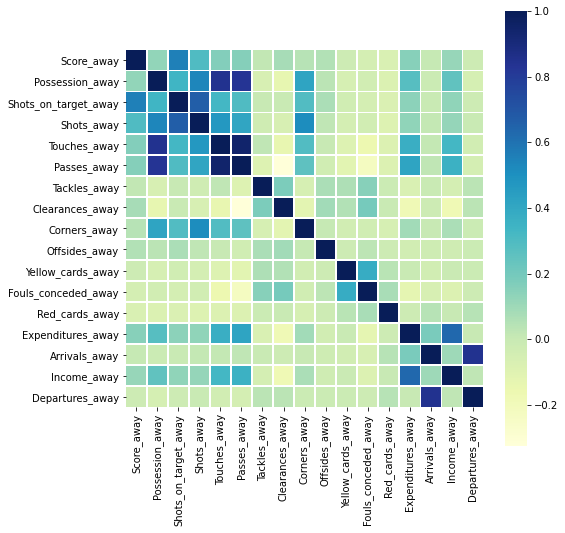

In [ ]:
import seaborn as sns
away_features = [f for f in list(df) if '_away' in f]
corr = df[away_features].corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr, square=True, cmap="YlGnBu",linewidths=0.1)
plt.show()


Examples of few features that looks strongly correlated are:
1) Possession home and touches/passes home,
2) Shots home and Shots on target home,
3) Score home and Shots on target.
These are intuitive as more possession leads to more touches.

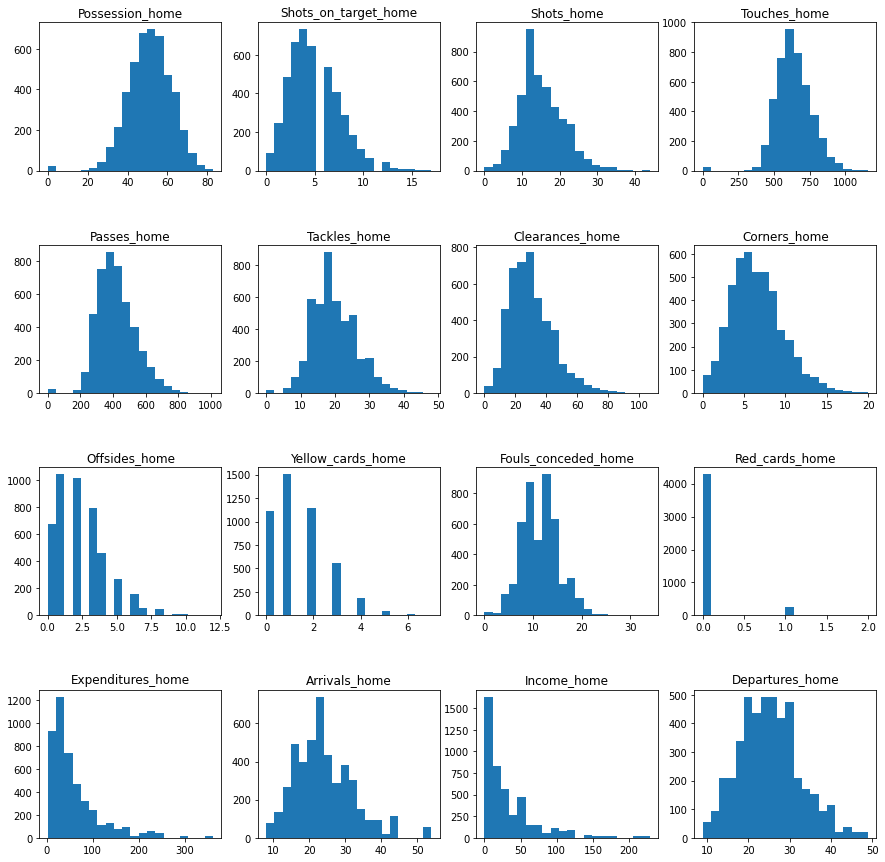

In [ ]:
import matplotlib.pyplot as plt
home_features = [f for f in list(df_mod) if '_home' in f]
n_figs = len(home_features)
columns = 4

fig, axes = plt.subplots(int(n_figs/columns), columns, figsize = (15,15))
plt.subplots_adjust(hspace=.5)


for i,feature in enumerate(home_features):
    row = int(i/columns)
    column = i%columns
    axes[row, column].hist(df[feature].values, 20)
    axes[row, column].set_title(feature)

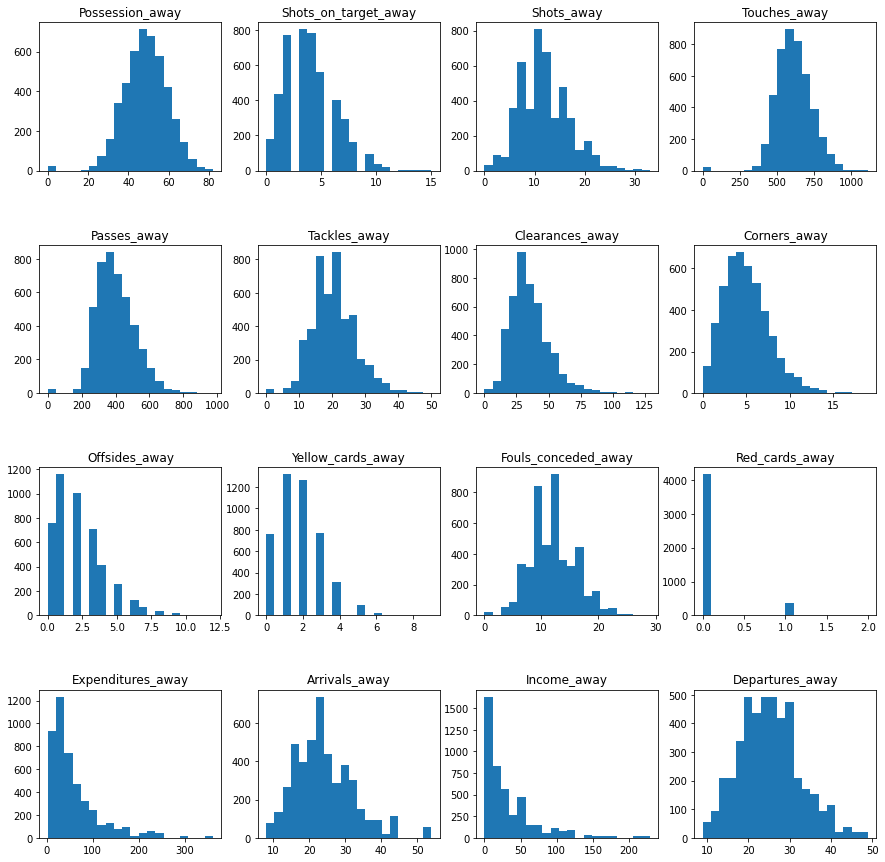

In [ ]:
n_figs = len(away_features)
columns = 4

fig, axes = plt.subplots(int(n_figs/columns), columns, figsize = (15,15))
plt.subplots_adjust(hspace=.5)

away_features = [f for f in list(df_mod) if '_away' in f]
for i,feature in enumerate(away_features):
    row = int(i/columns)
    column = i%columns
    axes[row, column].hist(df[feature].values, 20)
    axes[row, column].set_title(feature)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


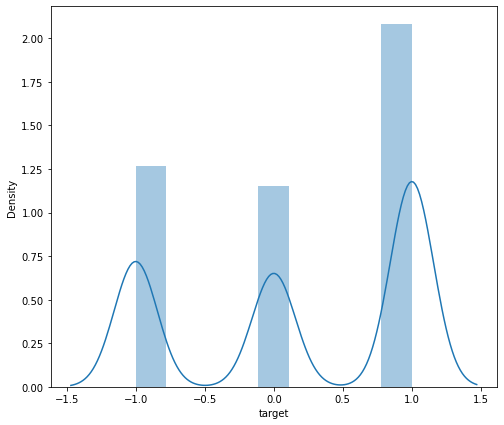

In [ ]:
#lets see target distribution
plt.figure(figsize=(8,7))
sns.distplot(df.target)
plt.show()

Seems like home team wins more than away which is shown by more 1s.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

df_mod = df_mod.drop(columns = ['target'])
X = df_mod.values
y = df['target'].values
features = df_mod.columns
forest = RandomForestClassifier(n_estimators=500, random_state=43)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=43)

forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,features[indices[f]], importances[indices[f]]))

 1) Shots_on_target_home           0.073068
 2) Clearances_away                0.064972
 3) Shots_on_target_away           0.058568
 4) Clearances_home                0.050302
 5) Expenditures_away              0.039533
 6) Expenditures_home              0.038386
 7) Passes_away                    0.036948
 8) Income_away                    0.036030
 9) Touches_away                   0.035701
10) Passes_home                    0.035578
11) Income_home                    0.034710
12) Touches_home                   0.032749
13) Shots_home                     0.032306
14) Shots_away                     0.031355
15) Possession_away                0.029745
16) Possession_home                0.029692
17) Tackles_away                   0.028653
18) Tackles_home                   0.028334
19) Arrivals_away                  0.027865
20) Arrivals_home                  0.027565
21) Departures_home                0.027099
22) Departures_away                0.026871
23) Fouls_conceded_away         

Red card have significant effect on game but here is least significant because of rare occurence.

In [ ]:
def goal_diff(scores):
    gd_dict = {}
    for game in scores:
        id, home_team, away_team, home_goals, away_goals = game
        score = home_goals - away_goals# in perspective of home team
        gd_dict[home_team] = gd_dict.get(home_team, []) + [(id,score)]
        gd_dict[away_team] = gd_dict.get(away_team, []) + [(id, -1*score)]
    return gd_dict

In [ ]:
def get_window(matchID, team, gd_vectors, window=5, boolean=False):
    team_results = gd_vectors[team]
    idx = -1
    for i, result in enumerate(team_results):
        if result[0] == matchID:
            id = i
            break
    if idx < window-1:
        return None
    return [team_results[i][1] for i in range(idx-window, idx)]

In [ ]:
import math
def form_values_exp(matchID, team, gd, alpha, boolean=True):
    avg_vec, i = [], 1
    while sum(avg_vec) < 1:
        avg_vec.append(math.e ** (-1*(alpha*i)))
        i += 1
    avg_vec = sorted(avg_vec)
    previous_results = get_window(matchID, team, gd, len(avg_vec), boolean)
    if not previous_results:
        return 0
    return np.dot(np.array(avg_vec), np.array(previous_results))

Include a special feauture called form (streak) from past 5 games.

In [ ]:
scores = df[['MatchID', 'Home_team', 'Away_team', 'Score_home', 'Score_away']].values
gd = goal_diff(scores)

home_form, away_form = [], []
for game in scores:
    id, home_team, away_team, home_score, away_score = game
    home_form.append(form_values_exp(id, home_team, gd, alpha=.5))
    away_form.append(form_values_exp(id, away_team, gd, alpha=.5))
    
df['form_home'] = pd.Series(home_form)
df['form_away'] = pd.Series(away_form)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [ ]:
lr = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000, multi_class='multinomial')
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
gb = GradientBoostingClassifier()
SVM = svm.SVC(decision_function_shape='ovo')
# NN = MLPClassifier(solver='lbfgs', alpha=1e-4, max_iter=1000, hidden_layer_sizes=(150,10), random_state=1)
NN = MLPClassifier(solver='lbfgs', alpha=1e-4, max_iter=1000, hidden_layer_sizes=(80,4), random_state=1)

clf_labels = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machines', 'Neural Network']
all_clf = [lr, rf, gb, SVM, NN]

In [ ]:
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

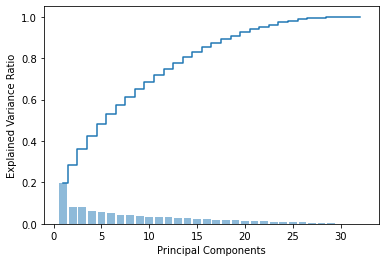

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

plt.bar(range(1,33), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,33), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()

With around 10 components we see 60% explained variance, with around 15 components around 80% of explained variance and somewhere with 25 components around 90% of explained variance.

In [ ]:
pca_15 = PCA(n_components = 15)
X_train_pca_15 = pca_15.fit_transform(X_train_std)
X_test_pca_15 = pca_15.transform(X_test_std)

pca_20 = PCA(n_components=20)
X_train_pca_20 = pca_20.fit_transform(X_train_std)
X_test_pca_20 = pca_20.transform(X_test_std)

pca_25 = PCA(n_components = 25)
X_train_pca_25 = pca_25.fit_transform(X_train_std)
X_test_pca_25 = pca_25.transform(X_test_std)


for label,clf in zip(clf_labels, all_clf):
    print('Model:', label)
    model_orig = clf.fit(X_train, y_train)
    print("Score in original dimension: ", model_orig.score(X_test, y_test))
    model_pca_15 = clf.fit(X_train_pca_15, y_train)
    print("Score in reduced dimension with 15 components: ", model_pca_15.score(X_test_pca_15, y_test))
    model_pca_20 = clf.fit(X_train_pca_20, y_train)
    print("Score in reduced dimension with 20 components: ", model_pca_20.score(X_test_pca_20, y_test))
    model_pca_25 = clf.fit(X_train_pca_25, y_train)
    print("Score in reduced dimension with 25 components: ", model_pca_25.score(X_test_pca_25, y_test), "\n")



Model: Logistic Regression
Score in original dimension:  0.6260964912280702
Score in reduced dimension with 15 components:  0.6019736842105263
Score in reduced dimension with 20 components:  0.6052631578947368
Score in reduced dimension with 25 components:  0.6129385964912281 

Model: Random Forest
Score in original dimension:  0.625
Score in reduced dimension with 15 components:  0.5964912280701754
Score in reduced dimension with 20 components:  0.606359649122807
Score in reduced dimension with 25 components:  0.6151315789473685 

Model: Gradient Boosting
Score in original dimension:  0.631578947368421
Score in reduced dimension with 15 components:  0.606359649122807
Score in reduced dimension with 20 components:  0.5997807017543859
Score in reduced dimension with 25 components:  0.6041666666666666 

Model: Support Vector Machines
Score in original dimension:  0.5241228070175439
Score in reduced dimension with 15 components:  0.6162280701754386
Score in reduced dimension with 20 compo

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Score in reduced dimension with 15 components:  0.5164473684210527


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Score in reduced dimension with 20 components:  0.5252192982456141
Score in reduced dimension with 25 components:  0.5219298245614035 



Reducing dimension by PCA does not do much good to our model. We get best performance while using Gradient Boosting with full dimensions or Linear Regression with 15 dimensions. We can keep 15 components.

In [ ]:
# NN = MLPClassifier(solver='lbfgs', alpha=1e-3, max_iter=10000, hidden_layer_sizes=(1000,10), random_state=1)
# model_temp = NN.fit(X_train, y_train)
# print("Score in original dimension: ", model_temp.score(X_test, y_test))
# NN = MLPClassifier(solver='lbfgs', alpha=1e-3, max_iter=10000, hidden_layer_sizes=(200,2), random_state=1)
# model_temp = NN.fit(X_train, y_train)
# print("Score in original dimension: ", model_temp.score(X_test, y_test))
# NN = MLPClassifier(solver='lbfgs', alpha=1e-3, max_iter=10000, hidden_layer_sizes=(300,3), random_state=1)
# model_temp = NN.fit(X_train, y_train)
# print("Score in original dimension: ", model_temp.score(X_test, y_test))
# NN = MLPClassifier(solver='lbfgs', alpha=1e-3, max_iter=10000, hidden_layer_sizes=(400,4), random_state=1)
# model_temp = NN.fit(X_train, y_train)
# print("Score in original dimension: ", model_temp.score(X_test, y_test))
# NN = MLPClassifier(solver='lbfgs', alpha=1e-3, max_iter=10000, hidden_layer_sizes=(500,5), random_state=1)
# model_temp = NN.fit(X_train, y_train)
# print("Score in original dimension: ", model_temp.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Score in original dimension:  0.5844298245614035
Score in original dimension:  0.4692982456140351
Score in original dimension:  0.4692982456140351
Score in original dimension:  0.4594298245614035
Score in original dimension:  0.4692982456140351


Using ensemble model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

estimator_list = [('lr',lr), ('rf',rf), ('gb', gb), ('SVM',SVM),('NN',NN)]
enclf = VotingClassifier(estimators=estimator_list, voting='hard')
scores = cross_val_score(estimator=enclf, X=X_train, y=y_train, cv=10, scoring='accuracy')
scores

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" %(scores.mean(), scores.std()))

Accuracy: 0.64 (+/- 0.02)


**Expected Goals**
To predict number of goals scored by each team within a single game.

Text(0.5, 1.0, 'Away Score')

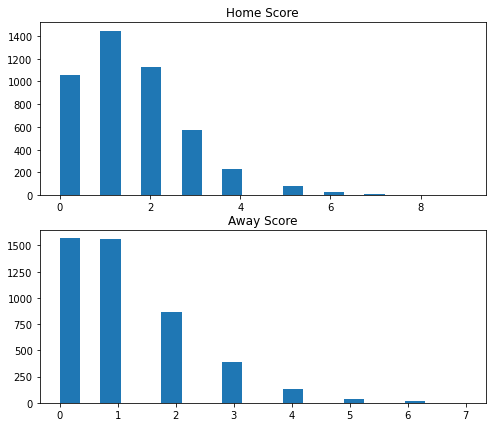

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,7))
ax1.hist(df.Score_home, 20)
ax1.set_title("Home Score")
ax2.hist(df.Score_away, 20)
ax2.set_title("Away Score")

This distribution looks like exponential which is intuitive as it is hard to score more goals and it depends more on in-game stats of team.

Now we will reduce features which we obtained after feature reduction techniques and correlation we looked at earlier.

In [ ]:
Target_proxies = ['MatchID', 'Team', 'year', 'Score']
#based on correlation and feature importance
Features_to_drop = ['Shots_home', 'Shots_away', 'Touches_home', 'Possession_home', 'Possession_away',
'Touches_away','Tackles_home', 'Tackles_away', 'Arrivals_home', 'Arrivals_away',
'Departures_home', 'Departures_away', 'Corners_home', 'Corners_away',
'Red_cards_home', 'Red_cards_away', 'Yellow_cards_home', 'Yellow_cards_away', 'form_home', 'form_away']

As form of Goal difference is mostly a 0 value because of exponential decrease in importance, it does not have a drastic importance. So drop it as well.

In [ ]:
df_mod_2 = df.drop(columns=Features_to_drop)
df_mod_2

,MatchID,Home_team,Away_team,Score_home,Score_away,Shots_on_target_home,Shots_on_target_away,Passes_home,Passes_away,Clearances_home,Clearances_away,Offsides_home,Offsides_away,Fouls_conceded_home,Fouls_conceded_away,year,Expenditures_home,Income_home,Expenditures_away,Income_away,target
373,5567,Arsenal,Aston Villa,1,1,7,3,631,232,14,51,2,6,10,19,2007,17.10,14.85,28.16,2.08,0
379,5568,Bolton,Spurs,2,0,4,2,243,427,20,43,3,1,22,22,2007,19.38,4.39,69.54,44.06,1
374,5569,Everton,Watford,2,1,2,7,288,321,61,32,5,1,12,15,2007,20.41,2.85,11.97,15.39,1
375,5570,Newcastle,Wigan,2,1,5,4,352,278,15,16,6,3,18,19,2007,36.34,12.74,29.24,27.73,1
376,5571,Portsmouth,Blackburn,3,0,11,3,279,327,15,28,5,0,22,17,2007,10.37,1.43,18.84,19.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,22717,Newcastle,Chelsea,3,0,6,2,406,569,10,37,0,2,11,10,2018,50.50,22.25,297.08,228.68,1
4182,22718,Southampton,Man City,0,1,3,2,259,583,30,21,4,2,8,10,2018,69.83,112.12,361.95,104.14,-1
4183,22719,Swansea,Stoke,1,2,11,5,544,414,4,43,1,5,12,9,2018,83.66,92.45,65.78,40.06,-1
4184,22720,Spurs,Leicester,5,4,6,9,480,265,17,19,2,4,9,13,2018,138.51,118.33,100.14,54.61,1


df_final becomes our X. Find y using the target varible.

In [ ]:
X1 = df_mod_2.drop(columns=['MatchID', 'Home_team', 'Away_team', 'year'])
y1 = df['target'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.2, random_state=43)

sc = StandardScaler()
X1_train_std = sc.fit_transform(X_train)
X1_test_std = sc.transform(X_test)

lr = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000, multi_class='multinomial')

In [ ]:
lr.fit(X1_train_std, y1_train)
print("Accuracy: ", lr.score(X1_test_std, y1_test))

Accuracy:  0.6282894736842105


Thus using Linear regression and reducing features as analyzed by techniques before, we get an accuracy of 62.82% of predicting the result of the game of leagues.

In [ ]:
home_attributes = ['MatchID', 'Home_team', 'year'] + [i for i in list(df_mod_2) if 'home' in i]
away_attributes = ['MatchID', 'Away_team', 'year'] + [i for i in list(df_mod_2) if 'away' in i]

Have a dataframe with only one team's features

In [ ]:
final = []
for _, row in df_mod_2.iterrows():
    home_team = [row[i] for i in home_attributes] + [0]
    away_team = [row[i] for i in away_attributes] + [1]
    final.append(home_team)
    final.append(away_team)

print(final[-1])

[22721, 'Everton', 2018, 1, 7, 365, 21, 1, 13, 231.65, 144.19, 1]


In [ ]:
features = ['MatchID', 'Team', 'year'] + [i.split('_')[0] for i in list(df_mod_2) if 'home' in i] + ['IsHome']
print(features)

['MatchID', 'Team', 'year', 'Score', 'Shots', 'Passes', 'Clearances', 'Offsides', 'Fouls', 'Expenditures', 'Income', 'IsHome']


In [ ]:
df_final = pd.DataFrame(final, columns = features)
df_final

,MatchID,Team,year,Score,Shots,Passes,Clearances,Offsides,Fouls,Expenditures,Income,IsHome
0,5567,Arsenal,2007,1,7,631,14,2,10,17.10,14.85,0
1,5567,Aston Villa,2007,1,3,232,51,6,19,28.16,2.08,1
2,5568,Bolton,2007,2,4,243,20,3,22,19.38,4.39,0
3,5568,Spurs,2007,0,2,427,43,1,22,69.54,44.06,1
4,5569,Everton,2007,2,2,288,61,5,12,20.41,2.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9107,22719,Stoke,2018,2,5,414,43,5,9,65.78,40.06,1
9108,22720,Spurs,2018,5,6,480,17,2,9,138.51,118.33,0
9109,22720,Leicester,2018,4,9,265,19,4,13,100.14,54.61,1
9110,22721,West Ham,2018,3,4,479,20,4,10,64.75,78.69,0


Now find ExpectedGoals. Using Expected Goals, we will find a team's expected number of goals scored based on some distribution and previos results. Just by comparing these xG, we will declare the winner for a game.

In [ ]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso, LassoLars, Ridge, BayesianRidge, SGDRegressor, LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor


In [ ]:
all_regs = [SVR(), MLPRegressor(), KNeighborsClassifier(), Lasso(), LassoLars(),
            Ridge(), BayesianRidge(), SGDRegressor(), AdaBoostRegressor(),
            ExtraTreesRegressor(), GradientBoostingRegressor(), 
            RandomForestRegressor(), LinearRegression()]

In [ ]:
from sklearn.metrics import mean_squared_error

df_final_mod = df_final.drop(columns = Target_proxies)

X = df_final_mod.values
y = df_final['Score'].values

reg_dict = {str(type(reg)).split('.')[-1][:-2]: [] for reg in all_regs}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=43)

for reg in all_regs:
    reg_name = str(type(reg)).split('.')[-1][:-2]
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    reg_dict[reg_name].append( ("rmse", mean_squared_error(y_test, y_pred)**.5))

rmse = []
for k,v in reg_dict.items():
    rmse.append((k, v[0][1]))
sorted(rmse, key=lambda x: x[1])

[('GradientBoostingRegressor', 1.0476679808835914),
 ('Ridge', 1.0483360868187832),
 ('LinearRegression', 1.0483361079788438),
 ('BayesianRidge', 1.0483445635459643),
 ('MLPRegressor', 1.0559851992947198),
 ('AdaBoostRegressor', 1.0720350150665876),
 ('RandomForestRegressor', 1.0796276861756529),
 ('ExtraTreesRegressor', 1.0943520790161436),
 ('Lasso', 1.1534239002762374),
 ('SVR', 1.2123354715319923),
 ('LassoLars', 1.3101170191594549),
 ('KNeighborsClassifier', 1.565887031105823),
 ('SGDRegressor', 20900617051055.145)]

Again Gradient Boosting Regressor seems to be giving best results.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gb_params = {'loss': ['ls', 'lad', 'huber'],
             'subsample': [0.2, 0.5, 1.0],
             'min_samples_split': [2, 5, 10],
             'max_depth': [3, 5, 7, 10]
             }

gb_cv = RandomizedSearchCV(GradientBoostingRegressor(), gb_params, cv=5,
                           n_jobs=-1, n_iter=20)
_ = gb_cv.fit(X,y)

In [ ]:
cv_res_dict = gb_cv.cv_results_
for param_set, test_score in zip(cv_res_dict['params'], cv_res_dict['mean_test_score']):
    print(param_set, " : ", test_score )

{'subsample': 1.0, 'min_samples_split': 2, 'max_depth': 7, 'loss': 'lad'}  :  0.26076809141425294
{'subsample': 0.5, 'min_samples_split': 2, 'max_depth': 5, 'loss': 'ls'}  :  0.30408210892715076
{'subsample': 0.2, 'min_samples_split': 5, 'max_depth': 7, 'loss': 'lad'}  :  0.27482527796807177
{'subsample': 1.0, 'min_samples_split': 5, 'max_depth': 10, 'loss': 'ls'}  :  0.23463239651920084
{'subsample': 1.0, 'min_samples_split': 2, 'max_depth': 5, 'loss': 'ls'}  :  0.30938242316242615
{'subsample': 0.5, 'min_samples_split': 2, 'max_depth': 3, 'loss': 'ls'}  :  0.32905364781196667
{'subsample': 0.2, 'min_samples_split': 5, 'max_depth': 10, 'loss': 'ls'}  :  0.1632744127701216
{'subsample': 0.5, 'min_samples_split': 5, 'max_depth': 3, 'loss': 'lad'}  :  0.305905347850314
{'subsample': 0.5, 'min_samples_split': 10, 'max_depth': 10, 'loss': 'huber'}  :  0.2287265041005356
{'subsample': 0.5, 'min_samples_split': 2, 'max_depth': 3, 'loss': 'lad'}  :  0.3037448753197741
{'subsample': 1.0, 'min_

So we will use Gradient Boosting model with ls loss function which gives result:

{'subsample': 0.2, 'min_samples_split': 2, 'max_depth': 10, 'loss': 'ls'}  :  0.14525918395391843

#Prediction

In [ ]:
window = 10
gbr = GradientBoostingRegressor(loss='ls', max_depth=10, min_samples_split=2, 
                                subsample=0.2)
year_to_test = 2018

In [ ]:
#Train
features_to_drop = ['MatchID', 'Team', 'year', 'Score']
X = df_final[df_final.year != year_to_test].drop(columns=features_to_drop).values
y = df_final[df_final.year != year_to_test].Score.values
goal_model = gbr.fit(X,y)

Predict Shots, Passes, Clearances, Offsides and Fouls using model trained on rest years

In [ ]:
model_map = {'Shots': GradientBoostingRegressor(),
             'Passes': LinearRegression(),
             'Clearances': GradientBoostingRegressor(),
             'Fouls': Ridge(),
             'Offsides': GradientBoostingRegressor()
             }

In [ ]:
features_to_drop = ['MatchID', 'Team', 'year']

for feature,clf in model_map.items():
    teams = df_final[df_final.year != year_to_test].Team.unique()
    X_list, y_list = [], []
    for team in teams:
        team_df = df_final[df_final.Team == team]
        fit_df = team_df[team_df.year != year_to_test].drop(columns=features_to_drop + [feature])
        for i in range(team_df.shape[0] - window - 1):
            X_vec = fit_df.iloc[i:i+window].values.flatten()
            if X_vec.shape[0] == 8 * window:
                X_list.append(X_vec)
                y_list.append(team_df[feature].values[i+window+1])
        
    X = np.vstack(X_list)
    y = np.array(y_list)
    clf.fit(X,y)
    model_map[feature] = clf

In [ ]:
simulated_df = df_final[df_final.year == 2017]
simulated_df.head()

,MatchID,Team,year,Score,Shots,Passes,Clearances,Offsides,Fouls,Expenditures,Income,IsHome
7594,14040,Arsenal,2017,3,5,485,9,4,13,128.82,11.80,0
7595,14040,Liverpool,2017,4,7,479,26,3,17,91.09,96.79,1
7596,14041,Bournemouth,2017,1,3,483,7,3,7,46.39,29.06,0
7597,14041,Man Utd,2017,3,7,561,30,4,10,210.90,53.75,1
7598,14042,Burnley,2017,0,3,353,16,3,10,51.98,1.37,0


In [ ]:
sim_stddev_map = {feature: np.std(df_final[feature]) for feature in model_map.keys()}
sim_mean_map = {feature: np.mean(df_final[feature]) for feature in model_map.keys()}

print(sim_mean_map)
print(sim_stddev_map)

{'Shots': 4.40188762071993, 'Passes': 410.9720149253731, 'Clearances': 32.79708077260755, 'Fouls': 11.764925373134329, 'Offsides': 2.259657594381036}
{'Shots': 2.546931901038951, 'Passes': 115.36831591439368, 'Clearances': 14.842825213227503, 'Fouls': 3.890462298957617, 'Offsides': 1.8304938875131618}


In [ ]:
test_season = df_final[df_final.year == year_to_test].drop(columns = list(model_map.keys()) + ['Score'])
test_season.head()

,MatchID,Team,year,Expenditures,Income,IsHome
8352,22342,Arsenal,2018,174.25,178.07,0
8353,22342,Leicester,2018,100.14,54.61,1
8354,22343,Brighton,2018,72.39,0.00,0
8355,22343,Man City,2018,361.95,104.14,1
8356,22344,Chelsea,2018,297.08,228.68,0


In [ ]:
def fit_game(game, df, model_map, goal_model, noise_map, window=10,
             relegated=['Hull', 'Middlesbrough', 'Sunderland'],
             features_to_drop = ['MatchID', 'Team', 'year']):
    team_df = df[df.Team == game.Team]
    if team_df.shape[0] < window:#Newly promoted teams take same form as last season relegated teams
        relegated_df = df[(df.Team == relegated[0]) |
                          (df.Team == relegated[1]) | 
                          (df.Team == relegated[2]) ]
        team_df = pd.concat([relegated_df, team_df])
    
    #Insert randomly distribution in statistical features
    new_row = {'MatchID':game.MatchID, 'Team':game.Team, 'year':game.year,
               'Score':None, 'Shots':None, 'Passes':None, 'Offsides':None,
               'Fouls':None, 'Expenditures':game.Expenditures, 'Income': game.Income,
               'IsHome':game.IsHome}
    
    for feature in model_map.keys():
        X = team_df.tail(window).drop(columns=features_to_drop + [feature]).values.flatten().reshape(1,-1)
        noise = noise_map[feature]*np.random.normal()
        new_row[feature] = max(int(model_map[feature].predict(X)[0]) + noise, 0)
    
    goal_features = ['Shots', 'Passes', 'Clearances', 'Offsides', 'Fouls', 'Expenditures', 'Income', 'IsHome']
    X_score_list = [new_row[feature] for feature in goal_features]
    X_score = np.array(X_score_list).reshape(1,-1)
    new_row['Score'] = int(goal_model.predict(X_score)[0])
    return new_row

In [ ]:
for row in test_season.iterrows():
    game = row[1]
    sim_res = fit_game(game, simulated_df, model_map, goal_model, sim_stddev_map)
    simulated_df = simulated_df.append(sim_res, ignore_index=True)

print(simulated_df.head(10))

   MatchID            Team  year  Score  ...  Fouls  Expenditures  Income  IsHome
0    14040         Arsenal  2017      3  ...   13.0        128.82   11.80       0
1    14040       Liverpool  2017      4  ...   17.0         91.09   96.79       1
2    14041     Bournemouth  2017      1  ...    7.0         46.39   29.06       0
3    14041         Man Utd  2017      3  ...   10.0        210.90   53.75       1
4    14042         Burnley  2017      0  ...   10.0         51.98    1.37       0
5    14042         Swansea  2017      1  ...   14.0         66.35   55.40       1
6    14043         Chelsea  2017      2  ...   16.0        151.39  123.58       0
7    14043        West Ham  2017      1  ...   16.0         95.19   46.74       1
8    14044  Crystal Palace  2017      0  ...   12.0        115.48   57.23       0
9    14044       West Brom  2017      1  ...   15.0         43.21   30.75       1

[10 rows x 12 columns]


In [ ]:
def get_team_points(df, test_year = 2018):
    year_df = df[df.year == test_year]
    point_dict = { team: [] for team in year_df.Team.unique() }
    match_ids = year_df.MatchID.unique() # need to match games on MatchID
    for match_id in match_ids:
        game = year_df[year_df.MatchID == match_id]
        result = game[['Team', 'Score']].values
        if result[0][1] == result[1][1]:  # draw
            point_dict[result[0][0]].append(1)
            point_dict[result[1][0]].append(1)
        elif result[0][1] > result[1][1]:
            point_dict[result[0][0]].append(3)
            point_dict[result[1][0]].append(0)
        else:
            point_dict[result[0][0]].append(0)
            point_dict[result[1][0]].append(3)

    table = []
    for team, point_list in point_dict.items():
        table.append( (team, sum(point_list)) )
    return table

In [ ]:
points = get_team_points(simulated_df)
sorted(points, key=lambda x: -x[1])

[('Man Utd', 76),
 ('Arsenal', 71),
 ('Spurs', 70),
 ('Southampton', 63),
 ('Chelsea', 60),
 ('Leicester', 58),
 ('Bournemouth', 57),
 ('Man City', 55),
 ('Everton', 51),
 ('Swansea', 51),
 ('Liverpool', 51),
 ('Stoke', 49),
 ('Brighton', 46),
 ('Burnley', 44),
 ('Crystal Palace', 41),
 ('Watford', 39),
 ('Huddersfield', 38),
 ('Newcastle', 38),
 ('West Ham', 31),
 ('West Brom', 30)]

This model rightly predicts that West Brom will finish bottom of the table and will be relegated and that Manchester United will come close to winning the premier league. However it wrongly predicts that Man City will be struggling and that Southhampton will finish in top 4.

Now we will do more runs to get a better model.

In [ ]:
runs = 50

In [ ]:
season_df = df_final[df_final.year == year_to_test].drop(columns = list(model_map.keys()) + ['Score'])
base_df = df_final[df_final.year == (year_to_test-1)]

total_points = {team: [] for team in season_df.Team.unique()}
positions = {team: [] for team in season_df.Team.unique()}

for run in range(runs):
    run_df = base_df.copy()
    for row in season_df.iterrows():
        game = row[1]
        simulated_res = fit_game(game, run_df, model_map, goal_model, sim_stddev_map)
        run_df = run_df.append(simulated_res, ignore_index=True)

    simulated_table = get_team_points(run_df)
    for points in simulated_table:
        total_points[points[0]].append(points[1])

    sorted(simulated_table, key=lambda x: -x[1])
    standings = [t[0] for t in simulated_table]

    for i,team in enumerate(standings):
        positions[team].append(i+1)

In [ ]:
sorted( [(team, sum(points)/len(points)) for team, points in total_points.items()], key = lambda x: -x[1] )

[('Chelsea', 75.26),
 ('Spurs', 68.0),
 ('Man City', 65.84),
 ('Liverpool', 60.22),
 ('Arsenal', 59.6),
 ('Man Utd', 57.02),
 ('Watford', 56.66),
 ('Southampton', 55.56),
 ('Everton', 55.54),
 ('Leicester', 52.1),
 ('Swansea', 52.04),
 ('Stoke', 49.0),
 ('Newcastle', 41.7),
 ('Burnley', 40.8),
 ('West Ham', 40.68),
 ('West Brom', 40.6),
 ('Brighton', 39.06),
 ('Huddersfield', 38.14),
 ('Crystal Palace', 37.6),
 ('Bournemouth', 36.58)]

This prediction looks very much similar to actual 2018 Premier League Table. All top 6 predicted teams are correct and 3 out of 4 teams are correctly predicted to be in top 4.